## __About the dataset__
*The data used for this analysis comes from a subset of The National Centers for Environmental Information (NCEI) Daily Global Historical Climatology Network (GHCN-Daily).*  
*The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.*

## __1.DataPreprocessing and Cleaning__

*Objective:* Clean and filter the data,remove leap days and prepare data for analysis.


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'C:\Users\User\Downloads\temperature.csv')

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# check if there is any missing value in the dataset
df.isnull().sum()
# as we dont have any missing values, we can now keep the data for 2004-2014
df = df[(df['Date'].dt.year >= 2005) & (df['Date'].dt.year <= 2014)]

# Remove leap days 
df =df[~((df['Date'].dt.month == 2) & (df['Date'].dt.day == 29))]

print(df)


                 ID       Date Element  Data_Value
0       USW00094889 2014-11-12    TMAX          22
1       USC00208972 2009-04-29    TMIN          56
2       USC00200032 2008-05-26    TMAX         278
3       USC00205563 2005-11-11    TMAX         139
4       USC00200230 2014-02-27    TMAX        -106
...             ...        ...     ...         ...
165079  USC00202308 2005-03-02    TMIN         -67
165081  USC00205822 2009-10-06    TMAX         167
165082  USC00205050 2014-07-14    TMAX         283
165083  USC00200230 2006-11-29    TMIN         117
165084  USC00207312 2006-09-04    TMIN         111

[151245 rows x 4 columns]


#### __Explanation:__ 
Here we have loaded the dataset,then changed the format of Date column and removed leap days.   
As there is no missing values in the dataset we can go further for the analysis.

#### __Modules used__: 
*Pandas*: Used for data manipulation and cleaning.  
No additional out-of-box modules were necessary for this step.

## __2.Plot High and Low Temperatures recorded between period 2005-2014__

*Objective:* In this step the data is to be visualized for high and low temperatures for each day and shade the region between the plot

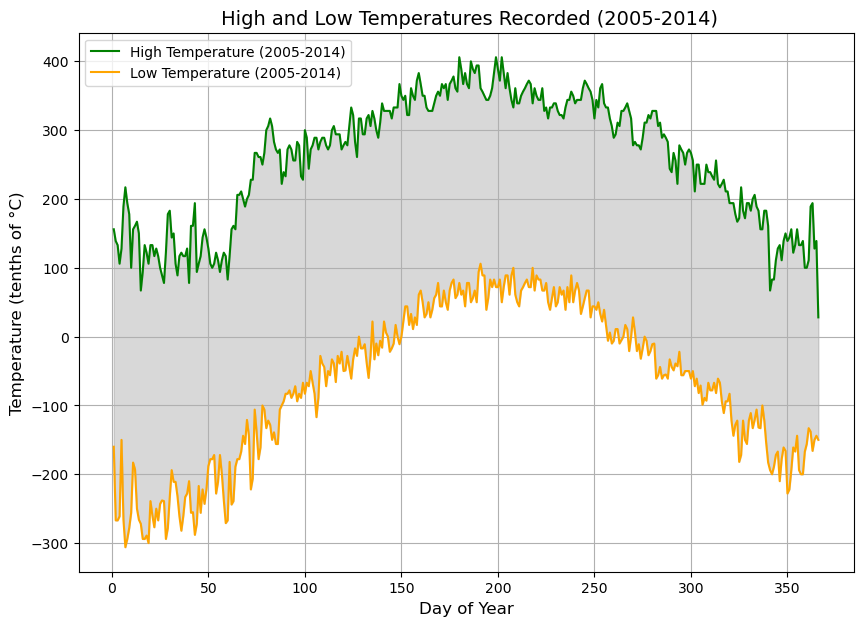

In [40]:
# Extract the day of the year (1 to 365)
df['day_of_year'] = df['Date'].dt.dayofyear
# Find the highest and lowest temperatures for each day of the year
high = df[df['Element'] == 'TMAX'].groupby('day_of_year')['Data_Value'].max()
low = df[df['Element'] == 'TMIN'].groupby('day_of_year')['Data_Value'].min()
# Plot the record high and low temperatures
plt.figure(figsize=(10, 7))
plt.plot(high.index, high.values, label='High Temperature (2005-2014)', color='green')
plt.plot(low.index, low.values, label='Low Temperature (2005-2014)', color='orange')
# Shade the area between the high and low
plt.fill_between(high.index, high.values, low.values, color='gray', alpha=0.3)
# Add labels and title
plt.title(' High and Low Temperatures Recorded (2005-2014)', fontsize=14)
plt.xlabel('Day of Year', fontsize=12)
plt.ylabel('Temperature (tenths of °C)', fontsize=12)
plt.legend()
plt.grid(True) #for better visualization setting grid=true
plt.show()


#### __Explanation:__
Grouped data by day of the year and calculate the maximum and minimum temperatures for each day.  
Plot these values on a line graph and shade the area between the high and low temperature for evaluation.

### __Modules Used__
**matplotlib.pyplot** This module is used for visualizing the data.

## __3.Overlaying a Scatter of 2015 Data Breaking the 2005-2014 Records__

*Objective:* The days in 2015 are highlighted for high and low temperature to show the variation for the period between 2004-2014

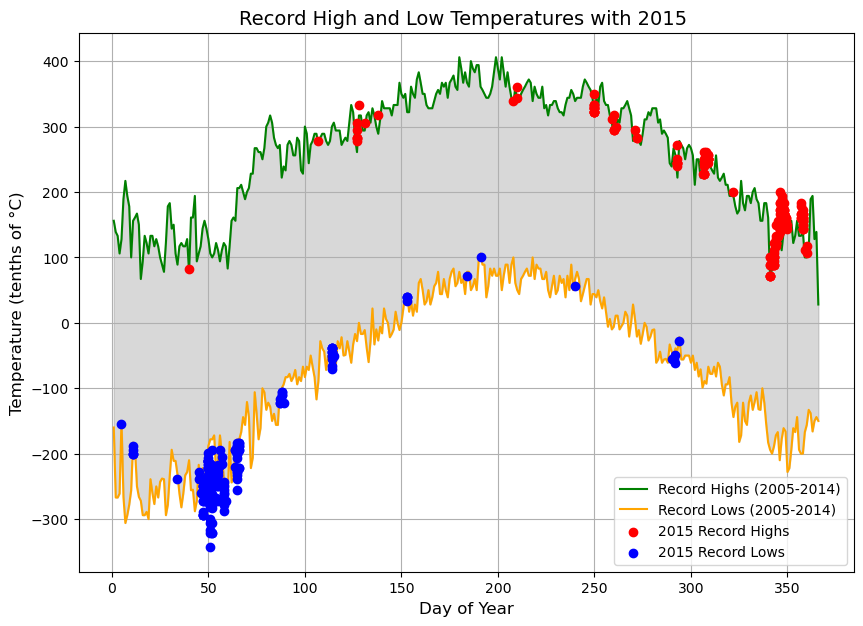

In [53]:
# Load the temperature data for 2015
temperature_2015 = pd.read_csv(r'C:\Users\User\Downloads\temperature.csv')
temperature_2015['Date'] = pd.to_datetime(temperature_2015['Date'])
# Filter the data for the year 2015
temperature_2015= temperature_2015[temperature_2015['Date'].dt.year == 2015]
# Extract the 'day_of_year' for 2015
temperature_2015['day_of_year'] = temperature_2015['Date'].dt.dayofyear
# Find where the 2015 data breaks
high_2015 = temperature_2015[(temperature_2015['Element'] == 'TMAX') & (temperature_2015['Data_Value'] > temperature_2015['day_of_year'].map(high))]
low_2015 = temperature_2015[(temperature_2015['Element'] == 'TMIN') &  (temperature_2015['Data_Value'] < temperature_2015['day_of_year'].map(low))]
plt.figure(figsize=(10, 7))
# Plot record highs and lows (2005-2014)
plt.plot(high.index, high.values, label='Record Highs (2005-2014)', color='green')
plt.plot(low.index, low.values, label='Record Lows (2005-2014)', color='orange')
# Shade the area between the high and low
plt.fill_between(high.index, high.values, low.values, color='gray', alpha=0.3)
# Add 2015 points where the records were broken
plt.scatter(high_2015['day_of_year'], high_2015['Data_Value'], color='red', label='2015 Record Highs', zorder=5)
plt.scatter(low_2015['day_of_year'], low_2015['Data_Value'], color='blue', label='2015 Record Lows', zorder=5)
plt.title('Record High and Low Temperatures with 2015 ', fontsize=14)
plt.xlabel('Day of Year', fontsize=12)
plt.ylabel('Temperature (tenths of °C)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

## __4.Visualizing Stations Around Ann Arbor, Michigan__
*Objective: Plot the stations around Ann Arbor, Michigan (within 100 km).*

In [75]:
# Weather Station Visualization near Ann Arbor, Michigan, United States
import pandas as pd 
import folium 
import math
from IPython.display import display
#load dataset
binsize = pd.read_csv(r"C:\Users\User\Downloads\BinSize.csv")
# Ann Arbor's latitude and longitude
ann_arbor_lat = 42.2808
ann_arbor_lon = -83.7430
# Function to calculate distance between two lat/lon points using a simple formula
def calculate_distance(lat1, lon1, lat2, lon2):
    # Approximate conversion from degrees to kilometers
    lat_diff = lat2 - lat1
    lon_diff = lon2 - lon1
    return math.sqrt(lat_diff**2 + lon_diff**2) * 111  # 111 km per degree of latitude
# Filter stations within 100 km of Ann Arbor
stations_near_ann_arbor = binsize[binsize.apply(lambda row: calculate_distance(ann_arbor_lat, ann_arbor_lon, row['LATITUDE'], row['LONGITUDE']) <= 100,axis=1)]
# Create a map centered around Ann Arbor and 
map = folium.Map(location=[ann_arbor_lat, ann_arbor_lon], zoom_start=10)
# Add markers for each station near Ann Arbor
for index, station in stations_near_ann_arbor.iterrows():folium.Marker([station['LATITUDE'], station['LONGITUDE']], popup=station['NAME']).add_to(map)
display(map)




### __Explanation__
Used latitude and longitude to plot the Stations Around Ann Arbor, Michigan

#### __Modules Used__

__folium__ Used to create interactive maps to display station locations. This is a great out-of-box solution for creating maps with markers.

## __5.Plot Temperature Summary near Ann Arbor, Michigan, United States (Year 2015)__

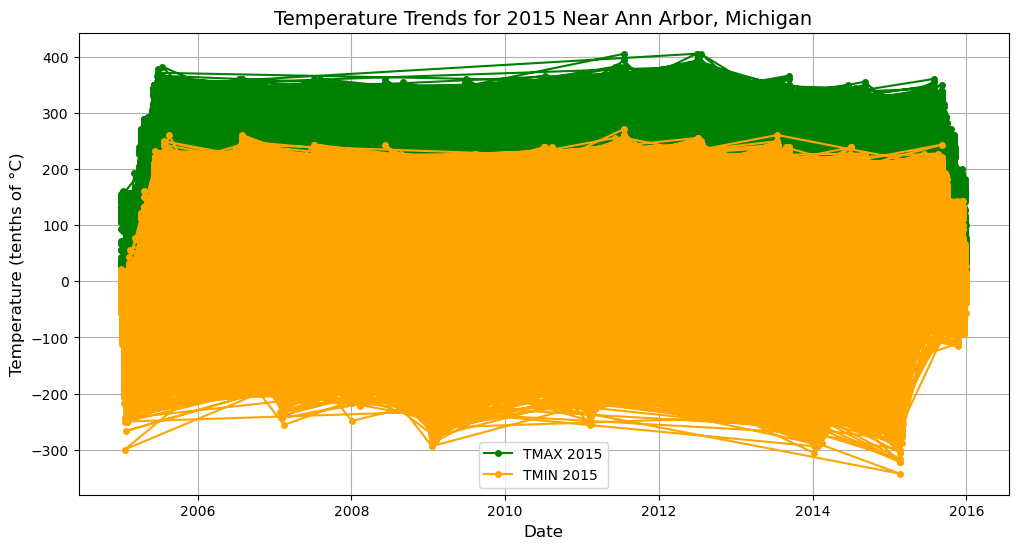

In [79]:
# Load temperature data for 2015
temperature_2015 = pd.read_csv(r'C:\Users\User\Downloads\temperature.csv')
temperature_2015['Date'] = pd.to_datetime(temperature_2015['Date'])
# Load station data to get LATITUDE and LONGITUDE
binsize_df = pd.read_csv(r"C:\Users\User\Downloads\BinSize.csv")
# Merge temperature data with station data to get LATITUDE and LONGITUDE
temperature_2015 = temperature_2015.merge(binsize_df[['ID', 'LATITUDE', 'LONGITUDE']], on='ID')
# Ann Arbor's latitude and longitude
ann_arbor_lat = 42.2808
ann_arbor_lon = -83.7430
# Function to calculate distance between two lat/lon points using a simple formula
def calculate_distance(lat1, lon1, lat2, lon2):
    # Approximate conversion from degrees to kilometers
    lat_diff = lat2 - lat1
    lon_diff = lon2 - lon1
    return math.sqrt(lat_diff**2 + lon_diff**2) * 111  # 111 km per degree of latitude
# Calculate the distance and filter temperature data for stations within 100 km of Ann Arbor
temperature_2015_near_ann_arbor = temperature_2015[
    temperature_2015.apply(lambda row: calculate_distance(ann_arbor_lat, ann_arbor_lon, row['LATITUDE'], row['LONGITUDE']) <= 100,axis=1)]
# Filter TMAX and TMIN separately for plotting
High = temperature_2015_near_ann_arbor[temperature_2015_near_ann_arbor['Element'] == 'TMAX']
Low = temperature_2015_near_ann_arbor[temperature_2015_near_ann_arbor['Element'] == 'TMIN']
# Plot temperature trends for 2015 near Ann Arbor
plt.figure(figsize=(12, 6))
# Plot TMAX with line and markers
plt.plot(High['Date'], High['Data_Value'], label='TMAX 2015', color='green', marker='o', linestyle='-', markersize=4)
# Plot TMIN with line and markers
plt.plot(Low['Date'], Low['Data_Value'], label='TMIN 2015', color='orange', marker='o', linestyle='-', markersize=4)
# Add title and labels
plt.title('Temperature Trends for 2015 Near Ann Arbor, Michigan', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (tenths of °C)', fontsize=12)
# Add grid and legend
plt.grid(True)
plt.legend()
# Show the plot
plt.show()

### __Explanation__

The temperature data for 2015 is filtered to include only stations near Ann Arbor.
We then create a line plot for maximum and minimum temperatures over the period of 2015.